## Imports and Garbage Collection

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from brightest_path_lib.algorithm import AStarSearch # type: ignore
from brightest_path_lib.input import CostFunction, HeuristicFunction # type: ignore
from brightest_path_lib.cost import ReciprocalConsistency, ConsistencyTurns
from IPython.display import Image
import matplotlib.image as mpimg
import cv2
import time
import gc
import json

gc.collect()

0

## Settings

In [3]:
file = "images/ex1.png"
cost_func = "ct-wght-sum_rgb-thresh"
parameters = "dir-wght=10000000"
bbox_file = "images/ex1_paths.json"

# start_end_dict = {"pair1": [(2270, 4246), (5117, 4600)],
#                   "pair2": [(397, 1137), (700, 7303)],
#                   "pair3": [(3026, 1571), (5128, 3577)],
#                   "pair4": [(4158, 5742), (5513, 5860)],
#                   "pair5": [(5100, 941), (3021, 1216)],
#                   }
# pair = "pair3"
# start_pixel, end_pixel = start_end_dict[pair][0], start_end_dict[pair][1]
bbox_json = {}
with open(bbox_file) as file:
    text = file.read()
    bbox_json = json.loads(text)

start_bbox = []
end_bbox = []
count = 0

for _, val in bbox_json.items():
    if type(val) == list:
        while count < 2:
            box_dict = val[count]
            if box_dict["type"] == "path" and count == 0:
                count += 1
                start_bbox.append(int(box_dict["x0"]))
                start_bbox.append(int(box_dict["y0"]))
                start_bbox.append(int(box_dict["x1"]))
                start_bbox.append(int(box_dict["y1"]))
            elif box_dict["type"] == "path" and count == 1:
                count += 1
                end_bbox.append(int(box_dict["x0"]))
                end_bbox.append(int(box_dict["y0"]))
                end_bbox.append(int(box_dict["x1"]))
                end_bbox.append(int(box_dict["y1"]))

print(start_bbox, end_bbox)


[169, 288, 457, 282] [1199, 378, 1199, 477]


## Pre-Processing

##### Image Processing

In [15]:
img_rgba = mpimg.imread(file)
img_gray = 1 - cv2.cvtColor(img_rgba, cv2.COLOR_BGR2GRAY)  # invert color

##### Cost Function

In [16]:
consistency_cost_func: CostFunction = ReciprocalConsistency(0, 1, img_rgba[start_pixel])
if cost_func[:2] == "ct":
    consistency_cost_func: CostFunction = ConsistencyTurns(0, 1, img_rgba[start_pixel])

##### AStarSearch Class Definition

In [17]:
astar = AStarSearch(img_gray, img_rgba, start_pixel, end_pixel,
                    cost_function=consistency_cost_func)

## A-Star

In [18]:
astar_start_time = time.time()
print(f"Starting AStar on {pair}...")
path = astar.search()
astar_end_time = time.time()
print("AStar ended.")
print(f"Astar Run Time: {astar_end_time - astar_start_time} seconds")

Starting AStar on pair3...
Found goal!
AStar ended.
Astar Run Time: 21.14484405517578 seconds


## Plotting Result

In [19]:
print("Loading Image ...")
plt.imshow(img_rgba)
print("Plotting Points and Path ...")
plt.plot(start_pixel[1], start_pixel[0], 'og')
plt.plot(end_pixel[1], end_pixel[0], 'or')
plt.plot([point[1] for point in astar.result], [point[0] for point in path], '-b', linewidth=3)
plt.plot(start_pixel[1], start_pixel[0], 'og')
plt.plot(end_pixel[1], end_pixel[0], 'or')
plt.tight_layout()
print("Saving Figure ...")
fig_name = f"images/substation3_200_{pair}_{cost_func}_{parameters}_demo.png"
plt.savefig(fig_name)
plt.close()
print('Done')

Loading Image ...
Plotting Points and Path ...
Saving Figure ...
Done


## Show Image

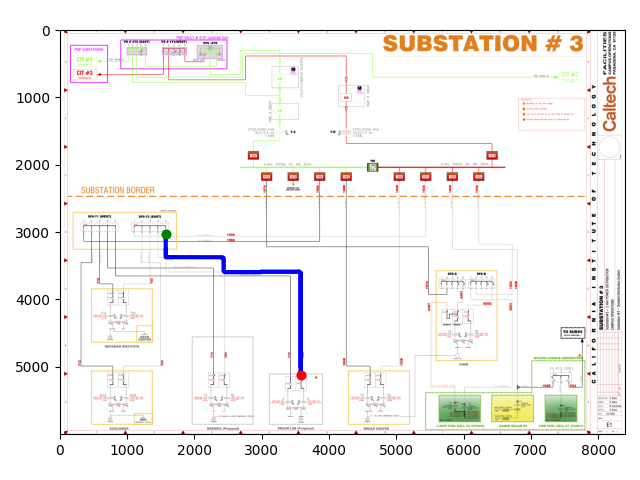

In [20]:
Image(filename=fig_name)

## Animation

In [9]:
import seaborn as sns
sns.set_theme(style="darkgrid")

In [40]:
%%capture
# astar.result
import matplotlib.animation as animation

# fig, ax = plt.subplots(figsize=(60,84))
fig, ax = plt.subplots(figsize=(5,7))
img_fig = ax.imshow(img_rgba)
plt.plot(start_pixel[1], start_pixel[0], 'og', markersize=5)
plt.plot(end_pixel[1], end_pixel[0], 'or', markersize=5)


In [41]:
def plot_frame_func(frame, ax, points):
    # ax.clear()
    ax.plot(points[frame][1], points[frame][0], 'bo', markersize=3)
    return ax

In [43]:
# frames_indicies = range(len(astar.result))
# %matplotlib widget
total_frames = len(astar.result)
step = int(total_frames / 30)
frames_indicies = range(0, total_frames, step)

ani = animation.FuncAnimation(fig, plot_frame_func, frames_indicies,
                              interval=100, 
                              repeat_delay=5000, blit=False,
                              fargs=(ax, astar.result))

# plt.show()

In [ ]:
from IPython.display import HTML
HTML(ani.to_jshtml())

In [44]:
print("Saving animation ...")
ani.save(f"images/animation_{pair}_{cost_func}_{parameters}.mp4")

Saving animation ...


/home/rabidsquir/brightest-path-lib/brightest-venv/lib/python3.10/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [16]:
img_rgba.shape
astar.result[0][1]
len(astar.result)

4883